# Setting up Paths

In [2]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
#path to compasrepo which contains ther popsynth folder
# pathRepo = '/Users/floorbroekgaarden/Programs/COMPAS/popsynth/Papers/BroekgaardenEtAl/black_hole-neutron_star/Scripts'



pathPostProcessing = '/Users/floorbroekgaarden/Projects/BHNS_project/Scripts'




# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('/Users/floorbroekgaarden/Projects/BHNS_project/Scripts')
# sys.path.append(pathPostProcessing+'/2_CosmicIntegration')

# Custom Imports from COMPASrepo

In [4]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
# import ClassEvents            as CE
# import ClassBayes             as CB
import coencodeVarious        as CV
from PostProcessingScripts import * 


# The cosmic integrator class

In [13]:
# #Will only look at BBHs so might as well set everything
# minz = 0.
# maxz = 2.
# resz = 1000
# Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BHNS',\
#        minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='Custom Flat', COMPASbinaryFraction=0.6)

# #I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
# #Doesnt matter to much (between WMAP and 
# #this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

# print(Data.COMPAS.mass1)

# The plot

In [14]:
# if redoCalculation:
#     for Pessimistic in [False, True]:
#         counterRow = 0
#         for v in a[b]:
#             print h5file[v]['SFR_MZ_GSMF'][...]
#             #per type (column)
#             counterColumn   = 0
#             types           = ['BBH', 'BHNS', 'BNS']
#             originalDCOfile = h5.File(pathCOMPASOutput+'COMPASOutput.h5')
#             for t in types:
#                 if Pessimistic:
#                     maskPessimistic = h5file[v][t]['Pessimistic'][...].squeeze() == True
#                     seedsInterest = h5file[v][t]['randomSeed'][...].squeeze()[maskPessimistic]
#                 else:
#                     seedsInterest = h5file[v][t]['randomSeed'][...].squeeze()
#                 seedsOriginal = originalDCOfile['doubleCompactObjects']['seed'][...].squeeze()
#                 #recover maskDCO for Bootstrap
#                 maskDCO       = np.in1d(seedsOriginal, seedsInterest)
#                 #for this type of this variation 
#                 for info in ['ObservedRate','IntrinsicRedshift0']:
#                     if Pessimistic:
#                         maskPessimistic = h5file[v][t]['Pessimistic'][...].squeeze() == True
#                         ratePerSystem = h5file[v][t][info][...].squeeze()[maskPessimistic]
#                     else:
#                         ratePerSystem = h5file[v][t][info][...].squeeze()
#                     centralValue  = np.sum(ratePerSystem)
#                     lower, Upper  = bootstrap(ratePerSystem)
#                     #fill in per three columns
#                     results[counterRow][counterColumn+0] = centralValue
#                     results[counterRow][counterColumn+1] = lower
#                     results[counterRow][counterColumn+2] = Upper
#                     counterColumn+=3
#             counterRow += 1
#         if Pessimistic:
#             np.savetxt('RatesPessimistic.txt', results)
#         else:
#             np.savetxt('RatesOptimistic.txt', results)
#         print 'Done'

# Fiducial model 

In [6]:
#The distribution of DCOs as a function of redshift

method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'fafafaffafffafds']


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]




# model 1: Fiducial  BBH and NNS

In [9]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
modelname = 'Fiducial'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
resz = 50



Data_model1 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BHNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)


#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model1.COMPAS.mass1)
print(len(Data_model1.COMPAS.mass1))


rates_model1    = []
totals_model1   = []
for nrL, L in enumerate(labels):
    Data_model1.MSSFR.Zprescription         = method[nrL]
    Data_model1.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model1.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model1.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model1.MSSFR.ZMprescription        = MZs[nrL]
    Data_model1.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model1.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model1.append(Row)
    totals_model1.extend([np.sum(Row)])
    print(L, np.sum(Row))
    
    
    






Data_model1_BBH = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model1_BBH.COMPAS.mass1)
print(len(Data_model1_BBH.COMPAS.mass1))

rates_model1_BBH    = []
totals_model1_BBH   = []
for nrL, L in enumerate(labels):
    Data_model1_BBH.MSSFR.Zprescription         = method[nrL]
    Data_model1_BBH.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model1_BBH.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model1_BBH.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model1_BBH.MSSFR.ZMprescription        = MZs[nrL]
    Data_model1_BBH.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model1_BBH.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model1_BBH.append(Row)
    totals_model1_BBH.extend([np.sum(Row)])
    print(L, np.sum(Row))


#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
modelname = 'Fiducial'
#Will only look at BNSs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000
Data_model1_BNS = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model1_BNS.COMPAS.mass1)
print(len(Data_model1_BNS.COMPAS.mass1))

rates_model1_BNS    = []
totals_model1_BNS   = []
for nrL, L in enumerate(labels):
    Data_model1_BNS.MSSFR.Zprescription         = method[nrL]
    Data_model1_BNS.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model1_BNS.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model1_BNS.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model1_BNS.MSSFR.ZMprescription        = MZs[nrL]
    Data_model1_BNS.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model1_BNS.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model1_BNS.append(Row)
    totals_model1_BNS.extend([np.sum(Row)])
    print(L, np.sum(Row))


    

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[2.06203 9.0769  2.98903 ... 4.78319 4.4085  4.66631]
1366530
('Preferred model', 52.72797194686592)
('Barrett et al. (2018) MSSFR', 307.6730479085448)
('Furlong et al. (2015) Single', 269.58544937670825)
('Ma et al. (2015)', 98.09355019012878)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[21.2069  19.5982  14.5595  ...  6.97008  7.22899  7.43115]
382737
('Preferred model', 15.2730617075158)
('Barrett et al. (2018) MSSFR', 175.84864913716513)
('Furlong et al. (2015) Single', 239.02946199632703)
('Ma et al. (2015)', 19.879586049789953)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[1.27767 1.27762 1.2777  ... 1.27763 1.27764 1.28488]
38183
('Preferred model', 0.17627434768649874)
('Barrett et al. (2018) MSSFR', 1.1339446699388045)
('Furlong et al. (2015) Single', 1.3610276192773152)
('Ma et al. (2015)', 0.25935973620

In [ ]:
from matplotlib.legend import Legend

modelname = 'alpha0_1'

# Different model

In [10]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
modelname = 'alpha0_1'
#Will only look at BBHs so might as well set everything

minz = 0.
maxz = 2.
resz = 50
Data_model2 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BHNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)


#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model2.COMPAS.mass1)
print(len(Data_model2.COMPAS.mass1))


rates_model2    = []
totals_model2   = []
for nrL, L in enumerate(labels):
    Data_model2.MSSFR.Zprescription         = method[nrL]
    Data_model2.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model2.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model2.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model2.MSSFR.ZMprescription        = MZs[nrL]
    Data_model2.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model2.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model2.append(Row)
    totals_model2.extend([np.sum(Row)])
    print(L, np.sum(Row))
    
    
    
    
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
modelname = 'alpha0_1'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000   /
Data_model2_BBH = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model2_BBH.COMPAS.mass1)
print(len(Data_model2_BBH.COMPAS.mass1))

rates_model2_BBH    = []
totals_model2_BBH   = []
for nrL, L in enumerate(labels):
    Data_model2_BBH.MSSFR.Zprescription         = method[nrL]
    Data_model2_BBH.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model2_BBH.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model2_BBH.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model2_BBH.MSSFR.ZMprescription        = MZs[nrL]
    Data_model2_BBH.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model2_BBH.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model2_BBH.append(Row)
    totals_model2_BBH.extend([np.sum(Row)])
    print(L, np.sum(Row))


#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
modelname = 'alpha0_1'
#Will only look at BNSs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000
Data_model2_BNS = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model2_BNS.COMPAS.mass1)
print(len(Data_model2_BNS.COMPAS.mass1))

rates_model2_BNS    = []
totals_model2_BNS   = []
for nrL, L in enumerate(labels):
    Data_model2_BNS.MSSFR.Zprescription         = method[nrL]
    Data_model2_BNS.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model2_BNS.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model2_BNS.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model2_BNS.MSSFR.ZMprescription        = MZs[nrL]
    Data_model2_BNS.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model2_BNS.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model2_BNS.append(Row)
    totals_model2_BNS.extend([np.sum(Row)])
    print(L, np.sum(Row))


    

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[2.04871 1.35708 1.31002 ... 6.16676 4.9449  6.16654]
50208
('Preferred model', 1.454685599151026)
('Barrett et al. (2018) MSSFR', 8.580549316090185)
('Furlong et al. (2015) Single', 7.710120687048763)
('Ma et al. (2015)', 2.6105387409392824)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[25.5051  24.4408  36.0009  ...  7.52356  7.53006  7.52837]
34657
('Preferred model', 9.273951984118575)
('Barrett et al. (2018) MSSFR', 103.99018274743237)
('Furlong et al. (2015) Single', 164.78252757037214)
('Ma et al. (2015)', 7.841199190960134)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[1.2776  1.5922  1.27763 ... 1.26001 1.26002 1.26002]
10890
('Preferred model', 0.04491788034192971)
('Barrett et al. (2018) MSSFR', 0.21763339702063517)
('Furlong et al. (2015) Single', 0.22868457947066695)
('Ma et al. (2015)', 0.064711868937

# MODEL 2: ALPHA = 10 

In [11]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha_10/'
modelname = 'alpha_10'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
resz = 50
Data_model3 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BHNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)


#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model3.COMPAS.mass1)
print(len(Data_model3.COMPAS.mass1))


rates_model3    = []
totals_model3   = []
for nrL, L in enumerate(labels):
    Data_model3.MSSFR.Zprescription         = method[nrL]
    Data_model3.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model3.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model3.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model3.MSSFR.ZMprescription        = MZs[nrL]
    Data_model3.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model3.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model3.append(Row)
    totals_model3.extend([np.sum(Row)])
    print(L, np.sum(Row))
    
    
    
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha_10/'
modelname = 'alpha_10'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000
Data_model3_BBH = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model3_BBH.COMPAS.mass1)
print(len(Data_model3_BBH.COMPAS.mass1))

rates_model3_BBH    = []
totals_model3_BBH   = []
for nrL, L in enumerate(labels):
    Data_model3_BBH.MSSFR.Zprescription         = method[nrL]
    Data_model3_BBH.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model3_BBH.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model3_BBH.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model3_BBH.MSSFR.ZMprescription        = MZs[nrL]
    Data_model3_BBH.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model3_BBH.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model3_BBH.append(Row)
    totals_model3_BBH.extend([np.sum(Row)])
    print(L, np.sum(Row))


#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha_10/'
modelname = 'alpha_10'
#Will only look at BNSs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000
Data_model3_BNS = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=False, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model3_BNS.COMPAS.mass1)
print(len(Data_model3_BNS.COMPAS.mass1))

rates_model3_BNS    = []
totals_model3_BNS   = []
for nrL, L in enumerate(labels):
    Data_model3_BNS.MSSFR.Zprescription         = method[nrL]
    Data_model3_BNS.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model3_BNS.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model3_BNS.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model3_BNS.MSSFR.ZMprescription        = MZs[nrL]
    Data_model3_BNS.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model3_BNS.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model3_BNS.append(Row)
    totals_model3_BNS.extend([np.sum(Row)])
    print(L, np.sum(Row))


    

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[3.40435 4.77606 1.27758 ... 6.16676 4.9449  6.16654]
275375
('Preferred model', 3.2385054609276542)
('Barrett et al. (2018) MSSFR', 29.27444633241505)
('Furlong et al. (2015) Single', 38.77772293267554)
('Ma et al. (2015)', 3.9680453355930516)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[24.4408  21.323   36.0009  ...  7.49146  7.52112  7.53674]
60987
('Preferred model', 7.845788960773962)
('Barrett et al. (2018) MSSFR', 84.50215093037355)
('Furlong et al. (2015) Single', 135.20438568871344)
('Ma et al. (2015)', 6.440324112945939)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[2.08562 1.2776  1.27764 ... 2.23647 1.3876  1.27772]
13072
('Preferred model', 0.09252629798865446)
('Barrett et al. (2018) MSSFR', 0.5225829632481357)
('Furlong et al. (2015) Single', 0.6082186175515376)
('Ma et al. (2015)', 0.1350473123707

# Optimistic (model 4)

In [12]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
modelname = 'Optimistic'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
resz = 50
Data_model4 = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BHNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=True, Cosmology='WMAP', COMPASbinaryFraction=0.6)


#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model4.COMPAS.mass1)
print(len(Data_model4.COMPAS.mass1))


rates_model4    = []
totals_model4   = []
for nrL, L in enumerate(labels):
    Data_model4.MSSFR.Zprescription         = method[nrL]
    Data_model4.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model4.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model4.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model4.MSSFR.ZMprescription        = MZs[nrL]
    Data_model4.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model4.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model4.append(Row)
    totals_model4.extend([np.sum(Row)])
    print(L, np.sum(Row))
    
    
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
modelname = 'Optimistic'
#Will only look at BBHs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000
Data_model4_BBH = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BBH',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=True, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model4_BBH.COMPAS.mass1)
print(len(Data_model4_BBH.COMPAS.mass1))

rates_model4_BBH    = []
totals_model4_BBH   = []
for nrL, L in enumerate(labels):
    Data_model4_BBH.MSSFR.Zprescription         = method[nrL]
    Data_model4_BBH.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model4_BBH.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model4_BBH.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model4_BBH.MSSFR.ZMprescription        = MZs[nrL]
    Data_model4_BBH.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model4_BBH.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model4_BBH.append(Row)
    totals_model4_BBH.extend([np.sum(Row)])
    print(L, np.sum(Row))


#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
modelname = 'alpha0_1'
#Will only look at BNSs so might as well set everything
minz = 0.
maxz = 2.
# resz = 1000
Data_model4_BNS = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput, DCOtypes='BNS',\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz, optimistic=True, Cosmology='WMAP', COMPASbinaryFraction=0.6)

#I use the custom cosmology because this was the flatlambda prescription used before WMAP Stevenson et al 2019
#Doesnt matter to much (between WMAP and 
#this it is 22, and 22.7 per year) but to prevent redoing all the numbers in the tex for referee

print(Data_model4_BNS.COMPAS.mass1)
print(len(Data_model4_BNS.COMPAS.mass1))

rates_model4_BNS    = []
totals_model4_BNS   = []
for nrL, L in enumerate(labels):
    Data_model4_BNS.MSSFR.Zprescription         = method[nrL]
    Data_model4_BNS.MSSFR.SFRprescription       = SFRs[nrL]
    Data_model4_BNS.MSSFR.logNormalPrescription = logNormal[nrL]
    Data_model4_BNS.MSSFR.GSMFprescription      = GSMFs[nrL]
    Data_model4_BNS.MSSFR.ZMprescription        = MZs[nrL]
    Data_model4_BNS.cosmologicalIntegration()
        
    
    Row        =np.sum(Data_model4_BNS.PerSystemPerRedshift_ratesObserved, axis=0)
    rates_model4_BNS.append(Row)
    totals_model4_BNS.extend([np.sum(Row)])
    print(L, np.sum(Row))


    

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[2.45955 2.06203 9.0769  ... 3.53668 4.66631 3.34219]
1407608
('Preferred model', 53.76542555297785)
('Barrett et al. (2018) MSSFR', 311.7434216537389)
('Furlong et al. (2015) Single', 273.7950483686165)
('Ma et al. (2015)', 99.69785667236512)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[21.2069  19.5982  14.5595  ...  3.07269  4.66946  5.41234]
412919
('Preferred model', 23.186877832582056)
('Barrett et al. (2018) MSSFR', 211.123775949247)
('Furlong et al. (2015) Single', 271.2878929906176)
('Ma et al. (2015)', 33.63206687113277)
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
[1.2776  1.5922  1.27763 ... 1.27761 1.87019 1.27761]
11642
('Preferred model', 0.07068918914827585)
('Barrett et al. (2018) MSSFR', 0.24376021226773395)
('Furlong et al. (2015) Single', 0.25407044629250497)
('Ma et al. (2015)', 0.101651296467

# PLOT COMBINED RATES 

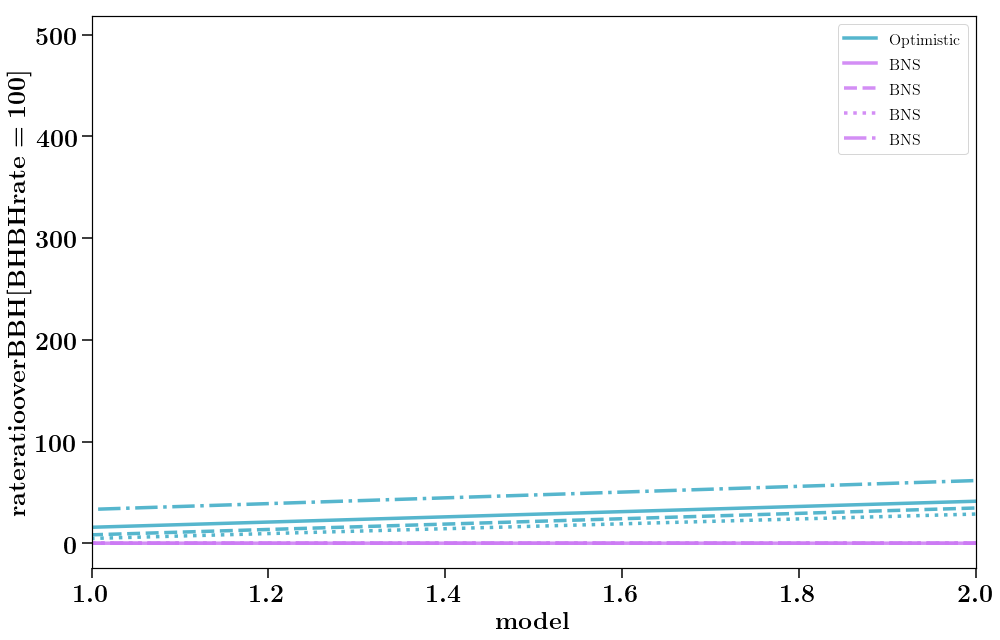

In [23]:


def plot_rates_MSSFR(modelnameslist, totalslists):
    fig , ax0       = plt.subplots(1,1,figsize=(14,9))

            ############
            #  Top panel with MSSFR
            ############
            
            
            
    totalslist, totalslist_BBH, totalslist_BNS = totalslists
    


    
    for nrL, L in enumerate(labels):
        array_BHNSratio, array_BNSratio = [], []
        for ind_m, model in enumerate(modelnameslist):
            tot_BHNS = totalslist[ind_m][nrL]
            tot_BBH  = totalslist_BBH[ind_m][nrL]
            tot_BNS  = totalslist_BNS[ind_m][nrL]
            
            array_BHNSratio.append((float(tot_BHNS)/tot_BBH))
            array_BNSratio.append((float(tot_BNS)  /tot_BBH))

        

        if nrL==0:
            label = modelnameslist[ind_m]
        else:
            label = None
        ax0.plot(range(len(modelnameslist)), np.asarray(array_BHNSratio)*100, \
                 lw=3.5, c=modelcolors[3], label=label, linestyle=linestyles[nrL], alpha=0.85)

        ax0.plot(range(len(modelnameslist)), np.asarray(array_BNSratio), \
                 lw=3.5, c=modelcolors[4], label='BNS', linestyle=linestyles[nrL], alpha=0.85)

    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm model  $'
    nameY = r'$\rm{rate ratio  over BBH}  [BHBH rate =100]$'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.160
#     ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1, right=len(modelnameslist)+-2)

#     ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./ratesRatiosAtRedshiftObs'+ '_combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$', 'Optimistic']

rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3,  totals_model4]
totalslist_BNS = [totals_model1_BNS, totals_model2_BNS, totals_model3_BNS,  totals_model4_BNS]
totalslist_BBH = [totals_model1_BBH, totals_model2_BBH, totals_model3_BBH,  totals_model4_BBH]


totalslists = [totalslist, totalslist_BBH, totalslist_BNS]

plot_rates_MSSFR(modelnameslist, totalslists)

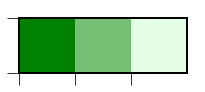

In [99]:
snscolor = sns.palplot(sns.light_palette("green",3, reverse=True))
snscolor = sns.color_palette(sns.light_palette("green",3 , reverse=True))

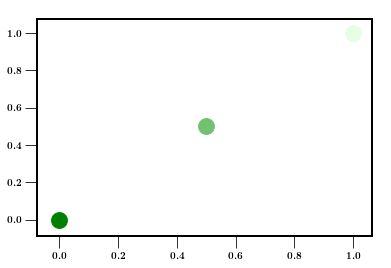

In [100]:
for xx_ind, xx in enumerate(np.linspace(0,1,3)):
    plt.scatter(xx,xx, c=snscolor[xx_ind], s=250)
    
    
    

In [103]:
xx = np.linspace(0,1,8)
print(xx[4:7])
print(xx[2])

[0.57142857 0.71428571 0.85714286]
0.2857142857142857


# PLOT COMBINED 

In [16]:
from matplotlib.legend import Legend

modelname = 'alpha0_1'

import seaborn as sns;

 sns.color_palette("husl", 8):
# ...    _ = plt.plot(np.c_[np.zeros(8), np.arange(8)].T)

[2.06203 2.17938 1.96106 ... 1.27758 1.27758 1.27758]
[2.04871 1.35708 1.31002 ... 1.29909 1.67342 1.81178]
[1.98766 1.66562 1.27758 ... 1.29909 1.67342 1.81178]


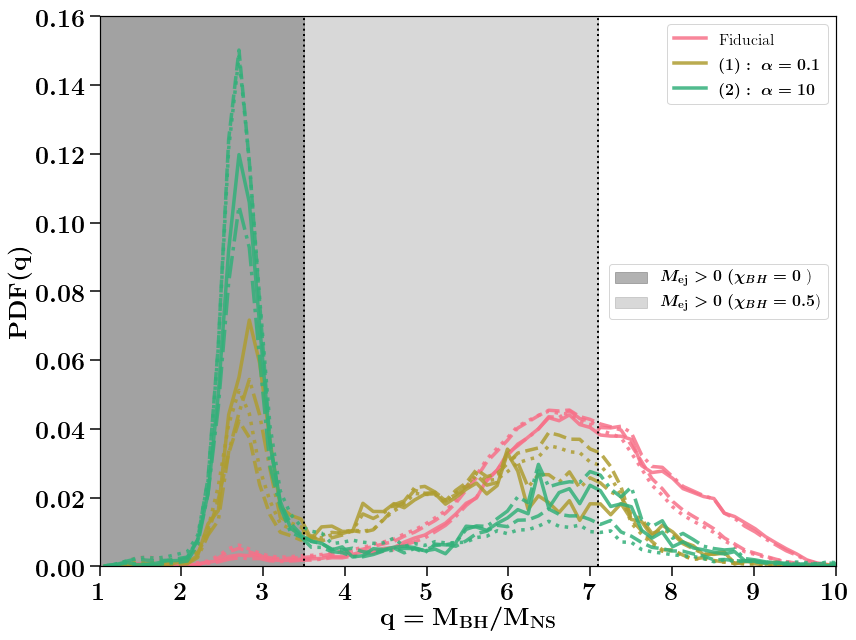

In [49]:


def plot_q_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH / MNS

        print MNS

        bins       = np.linspace(1,13.5,100)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm q = M_{BH} / M_{NS} $'
    nameY = r'$\rm PDF(q)   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.160
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1, right=10)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
    xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
    yy_disrupt_0spin = [0, topp]   
    xx_BHspin_0_5 = [0,7.1] 
    labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
    labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

    Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                           y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                            color='gray', label=labelqlegend, alpha =0.6)
    ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



    Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
                           y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
                            color='gray', label=labelqlegend, alpha =0.3)
    ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


    leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
    ax0.add_artist(leg2)

    plt.tight_layout()
#     plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./qDistributionAtRedshiftObs'+ 'combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_q_distributions(modelnameslist, rateslist, totalslist, Datalist)

In [50]:
# TOTAL MASS 

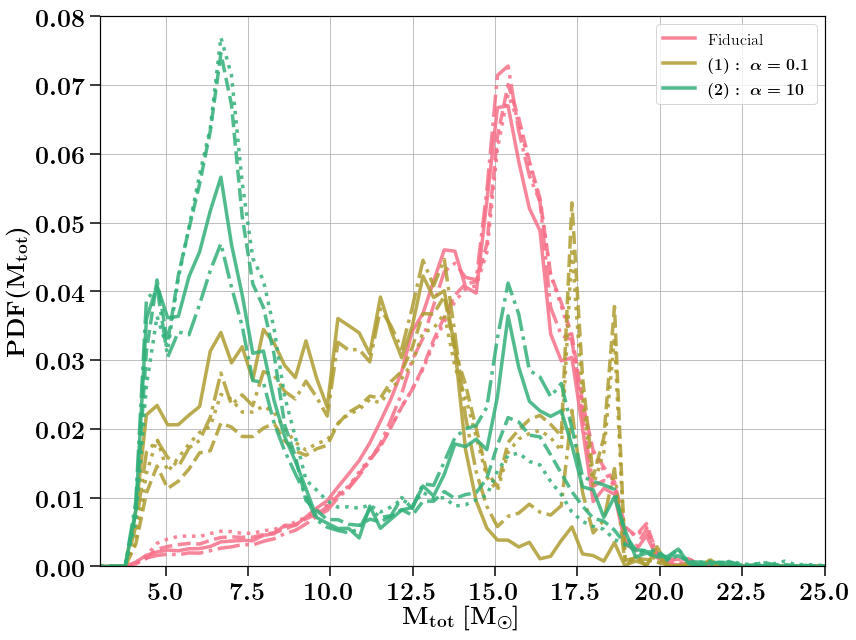

In [52]:


def plot_mtot_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
#         MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = M1 + M2

#         print MNS

        bins       = np.linspace(2,27.5,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{tot}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{tot}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.08
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=3, right=25)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mtotDistributionAtRedshiftObs'+ 'combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mtot_distributions(modelnameslist, rateslist, totalslist, Datalist)

In [ ]:
# Plot individual masses

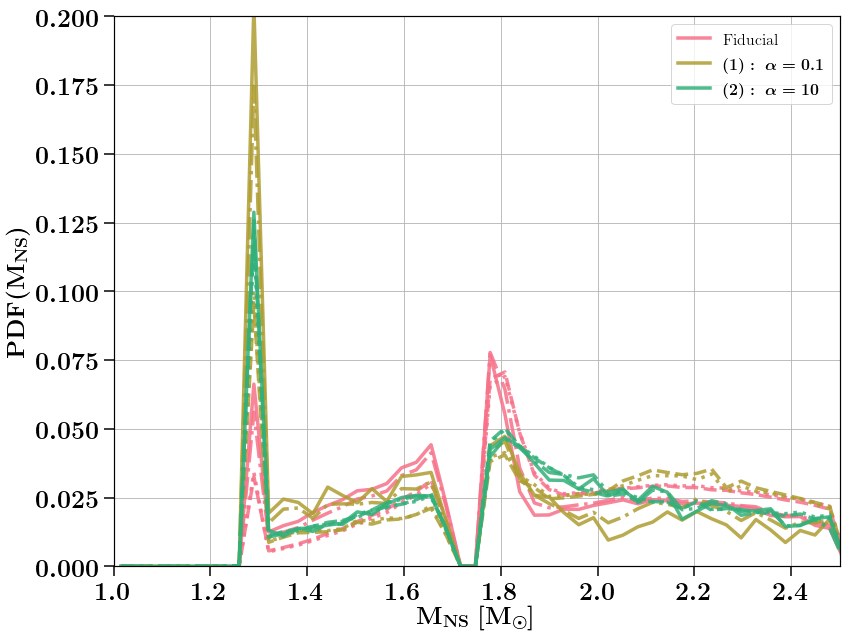

In [59]:


def plot_mns_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MNS

#         print MNS

        bins       = np.linspace(1,2.8,60)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{NS}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{NS}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.2
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1, right=2.5)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mnsDistributionAtRedshiftObs'+ 'combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mns_distributions(modelnameslist, rateslist, totalslist, Datalist)

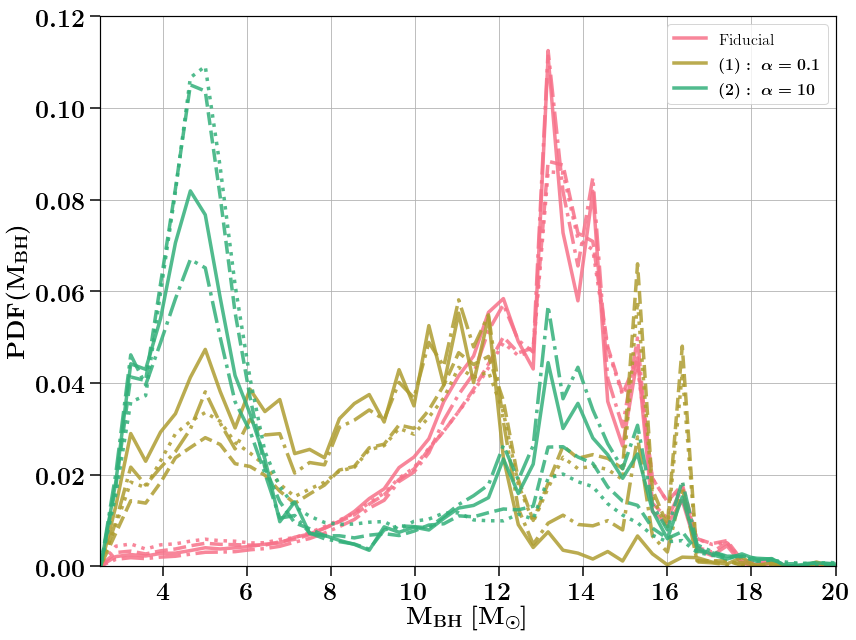

In [62]:


def plot_mbh_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = MBH

#         print MNS

        bins       = np.linspace(2,30,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{BH}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{BH}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.12
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=2.5, right=20.0)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mbhDistributionAtRedshiftObs'+ 'combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mbh_distributions(modelnameslist, rateslist, totalslist, Datalist)

# CHIRP MASS

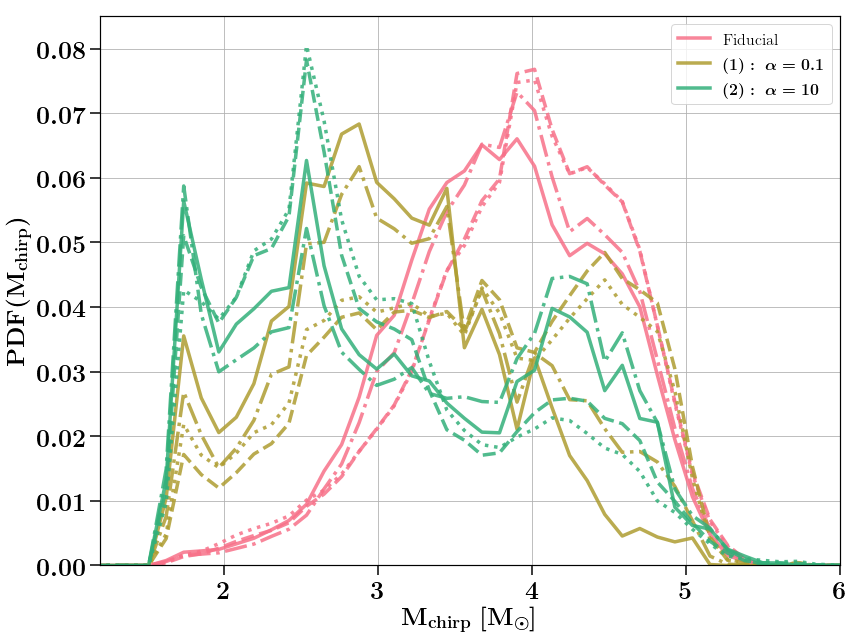

In [67]:


def plot_mchirp_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]


        M1         = Data.COMPAS.mass1
        M2         = Data.COMPAS.mass2
        MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
        var_x = Data.COMPAS.mChirp

#         print MNS

        bins       = np.linspace(1,10,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\rm M_{\rm{chirp}} \ [{\rm{M}}_{\odot}]$'
    nameY = r'$\rm PDF(M_{\rm{chirp}})   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=1, prop={'size':16})
    topp = 0.085
    ax0.set_ylim(bottom=0, top=topp)
    ax0.set_xlim(left=1.2, right=6)

    ## FILL PLOT WHERE BH-NS produces EM counterpart
#     xx = [0,3.5]  #np.linspace(min(bins),max(bins),2)
#     yy_disrupt_0spin = [0, topp]   
#     xx_BHspin_0_5 = [0,7.1] 
#     labelqlegend=r'$M_{\rm{ej}} > 0  \ (\chi_{BH}=0$ )'
#     labelqlegend2=r'$M_{\rm{ej}} > 0 \ (\chi_{BH}=0.5$)'

#     Mejected = ax0.fill_between(x=xx,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.6)
#     ax0.plot([3.5,3.5], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )



#     Mejected2 = ax0.fill_between(x=xx_BHspin_0_5,y1=[yy_disrupt_0spin[0],yy_disrupt_0spin[0]], \
#                            y2=[yy_disrupt_0spin[1],yy_disrupt_0spin[1]],\
#                             color='gray', label=labelqlegend, alpha =0.3)
#     ax0.plot([7.1,7.1], yy_disrupt_0spin, lw=2, color='k', linestyle=':' )


#     leg2 = Legend(ax0, [Mejected, Mejected2], [labelqlegend, labelqlegend2], fontsize=fs-8, loc="center right")
#     ax0.add_artist(leg2)

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./mchirpDistributionAtRedshiftObs'+ 'combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_mchirp_distributions(modelnameslist, rateslist, totalslist, Datalist)

In [ ]:
.tc

1.09287e-14
7.2065e-11
2.23101e-13


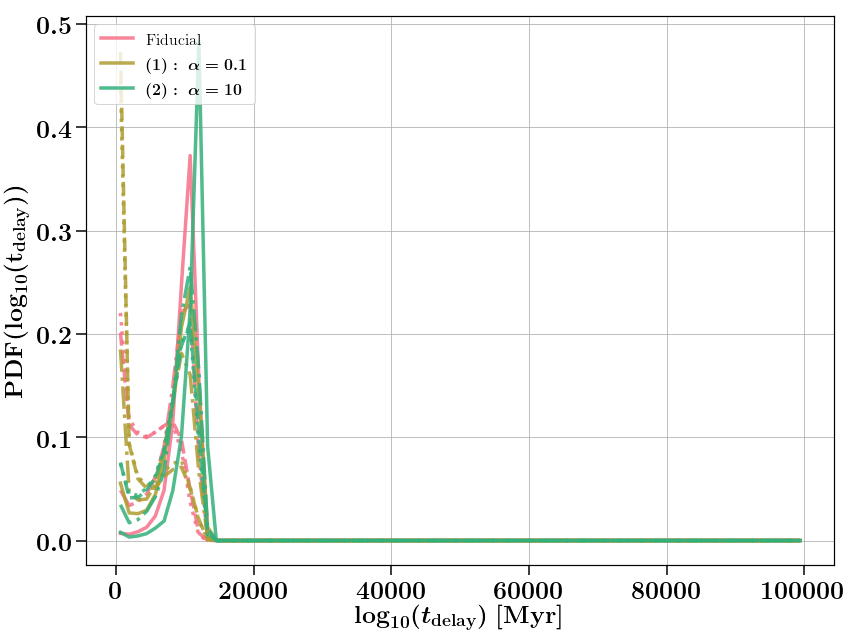

In [76]:


def plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist):
    fig , ax0       = plt.subplots(1,1,figsize=(12,9))

            ############
            #  Top panel with MSSFR
            ############
    for ind_m, model in enumerate(modelnameslist):
        Data = Datalist[ind_m]
        rates = rateslist[ind_m]
        totals = totalslist[ind_m]



        var_x = Data.COMPAS.tc
        var_x = np.log10(var_x)
        
        print(min(var_x))
#         print MNS

        bins       = np.linspace(-4,5,80)
        center     = (bins[1:]+bins[:-1])/2.
        dvar_x      = np.diff(bins)

        for nrL, L in enumerate(labels):
            rate       = rates[nrL]
            rate, _    = np.histogram(var_x, bins=bins, weights = rate)
            rate       = np.divide(rate, dvar_x)
            rate       = rate / np.sum(rate)
#             label      = labels[nrL]+r' $\rm \normalfont [%s \ yr^{-1}]$' %(int(totals[nrL]))
#             ax0.plot(center, rate, lw=3.5, c=colours[nrL], label=label, linestyle=linestyles[nrL], alpha=0.85)
            if nrL==0:
                label = modelnameslist[ind_m]
            else:
                label = None
            ax0.plot(center, rate, lw=3.5, c=modelcolors[ind_m], label=label, linestyle=linestyles[nrL], alpha=0.85)



    
    # ax0.get_xaxis().set_visible(True)
    nameX = r'$\log_{10}(t_{\rm{delay}}) \ [{\rm{Myr}}]$'
    nameY = r'$\rm PDF(\log_{10}(t_{\rm{delay}}))   $'
    ax0 = CV.layoutAxes(ax0, nameX=nameX, nameY=nameY)
    ax0.legend(loc=2, prop={'size':16})
    topp = 0.085
#     ax0.set_ylim(bottom=10, top=topp)
    ax0.set_xlim(left=-4, right=6)
    ax0.set_yscale('log')

    plt.tight_layout()
    plt.grid()



    # plt.subplots_adjust(wspace=0., hspace=0.0)
    plt.savefig('./tdelayDistributionAtRedshiftObs'+ 'combinedmodels' + '.png', dpi=300, transparent=False)
    plt.show()
    # plt.close()

cm       = plt.get_cmap('plasma_r')
modelcolors = sns.color_palette("husl", 5) 

Datalist = [Data_model1, Data_model2, Data_model3]
modelnameslist = [r'Fiducial', r'$(1): \ \alpha=0.1$', r'$(2): \ \alpha=10$']
rateslist = [rates_model1, rates_model2, rates_model3]
totalslist = [totals_model1, totals_model2, totals_model3]

plot_tdelay_distributions(modelnameslist, rateslist, totalslist, Datalist)